In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# Load the dataset
df = pd.read_csv("./datasets/heart.csv")
df1 = df.copy()  # Create a copy of the dataframe

# Define the columns to be encoded and scaled
cat_cols = ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Encoding the categorical columns
df1 = pd.get_dummies(df1, columns=cat_cols)

# Define the features and target
X = df1.drop(['target'], axis=1)
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)
# X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
# X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

X_train_normalized = X_train
X_test_normalized = X_test
# Instantiate and fit the SVM model
svm = SVC(kernel='linear', C=1, random_state=42,
          probability=True).fit(X_train_normalized, y_train)

# Predicting values
y_pred_svm = svm.predict(X_test_normalized)

# Printing the test accuracy for SVM
print("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred_svm), f1_score(y_test, y_pred_svm))

# Instantiate and fit the Logistic Regression model
logreg = LogisticRegression(penalty='none', max_iter=2000).fit(
    X_train_normalized, y_train)

# Predicting values
y_pred_logreg = logreg.predict(X_test_normalized)

# Printing the test accuracy for Logistic Regression
print("The test accuracy score of Logistic Regression is ", accuracy_score(
    y_test, y_pred_logreg), f1_score(y_test, y_pred_logreg))

# Instantiate and fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Predicting values
y_pred_dt = dt.predict(X_test)

# Printing the test accuracy for Decision Tree
print("The test accuracy score of Decision Tree is ", accuracy_score(
    y_test, y_pred_dt), "f1 :",  f1_score(y_test, y_pred_dt))

# Instantiate and fit the Random Forest model
rf = RandomForestClassifier().fit(X_train, y_train)

# Predicting values
y_pred_rf = rf.predict(X_test)

# Printing the test accuracy for Random Forest
print("The test accuracy score of Random Forest is ", accuracy_score(
    y_test, y_pred_rf), "f1 :",  f1_score(y_test, y_pred_rf))

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict values
y_pred_xgb = xgb_classifier.predict(X_test)

# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of Gradient Boosting Classifier is ",
      accuracy_score(y_test, y_pred_xgb), "f1 :",  f1_score(y_test, y_pred_xgb))

# Instantiate the mlp
mlp = MLPClassifier(hidden_layer_sizes=(64, 64),
                    max_iter=1000, random_state=42)

# Fit the mlp model
mlp.fit(X_train, y_train)

# Predict values
y_pred_mlp = mlp.predict(X_test)

# Printing the test accuracy for mlp Classifier
print("The test accuracy score of MLP Classifier is ", accuracy_score(
    y_test, y_pred_mlp), "f1 :",  f1_score(y_test, y_pred_mlp))

# Instantiate the KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the mlp model
knn.fit(X_train, y_train)

# Predict values
y_pred_knn = knn.predict(X_test)

# Printing the test accuracy for mlp Classifier
print("The test accuracy score of knn Classifier is ", accuracy_score(
    y_test, y_pred_mlp), "f1 :",  f1_score(y_test, y_pred_knn))
# Calculate permutation importance for SVM
perm_importance_svm = permutation_importance(
    svm, X_test_normalized, y_test, n_repeats=30, random_state=42, n_jobs=50)

# Get feature importances
rf_importances = rf.feature_importances_
xgb_importances = xgb_classifier.feature_importances_
logreg_importances = abs(logreg.coef_[0])
current_importance_type = xgb_classifier.get_booster().get_score()
print(current_importance_type)
# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'DecissionTree': dt.feature_importances_,
    'XGBoost': xgb_importances,
    'LogisticRegression': logreg_importances,
    'SVM': perm_importance_svm.importances_mean,
})

# Display feature importances
display(feature_importances)

The test accuracy score of SVM is  0.814935064935065 0.8167202572347267
The test accuracy score of Logistic Regression is  0.8084415584415584 0.8115015974440895
The test accuracy score of Decision Tree is  0.9707792207792207 f1 : 0.9688581314878892
The test accuracy score of Random Forest is  0.9805194805194806 f1 : 0.9794520547945206
The test accuracy score of Gradient Boosting Classifier is  0.9805194805194806 f1 : 0.9794520547945206
The test accuracy score of MLP Classifier is  0.7987012987012987 f1 : 0.7769784172661871
The test accuracy score of knn Classifier is  0.7987012987012987 f1 : 0.8800000000000001
{'age': 136.0, 'trestbps': 69.0, 'chol': 99.0, 'thalach': 101.0, 'oldpeak': 89.0, 'sex_0': 22.0, 'exang_0': 13.0, 'ca_0': 41.0, 'ca_1': 14.0, 'ca_2': 4.0, 'ca_3': 6.0, 'cp_0': 34.0, 'cp_1': 2.0, 'cp_2': 12.0, 'cp_3': 6.0, 'fbs_0': 8.0, 'restecg_0': 18.0, 'restecg_1': 20.0, 'slope_0': 1.0, 'slope_1': 18.0, 'slope_2': 6.0, 'thal_1': 4.0, 'thal_2': 22.0, 'thal_3': 19.0}


,Feature,RandomForest,DecissionTree,XGBoost,LogisticRegression,SVM
0,age,0.067565,0.130415,0.026016,0.036390,0.003355
1,trestbps,0.066167,0.057138,0.018294,0.022504,-0.002056
2,chol,0.067427,0.038382,0.021340,0.012701,-0.025325
3,thalach,0.097924,0.062693,0.019361,0.022986,-0.001190
4,oldpeak,0.089738,0.085395,0.024478,0.514439,0.010498
5,sex_0,0.018919,0.019651,0.021226,1.117775,-0.000866
6,sex_1,0.016731,0.006191,0.000000,0.968913,-0.000866
7,exang_0,0.026349,0.002010,0.018726,0.351583,0.003355
8,exang_1,0.027969,0.015103,0.000000,0.202721,0.003355
9,ca_0,0.068953,0.065917,0.070973,1.406991,0.010281


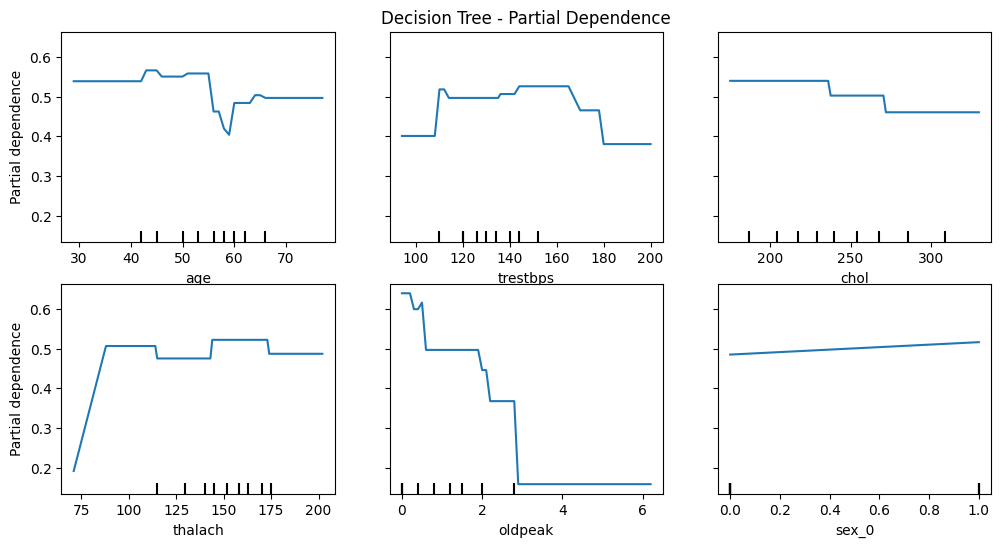

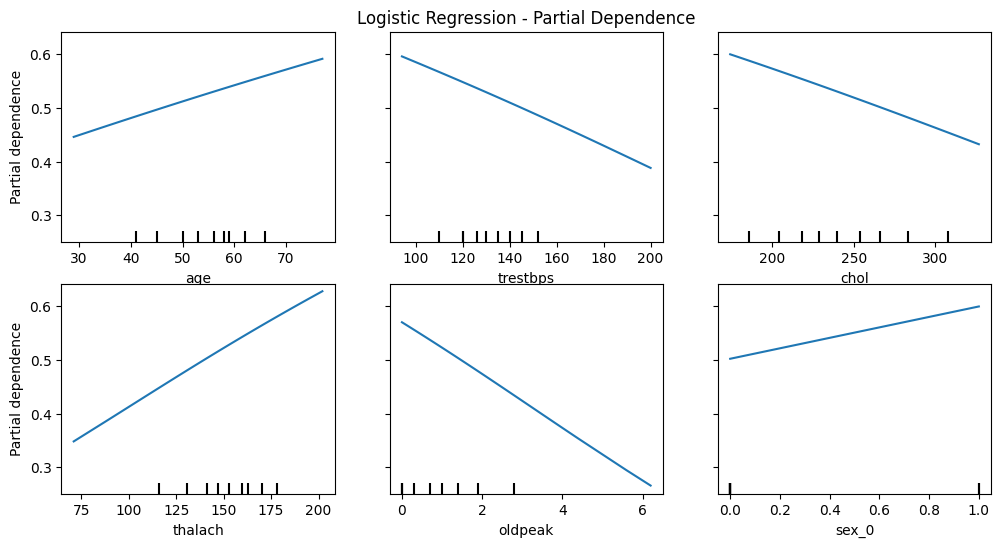

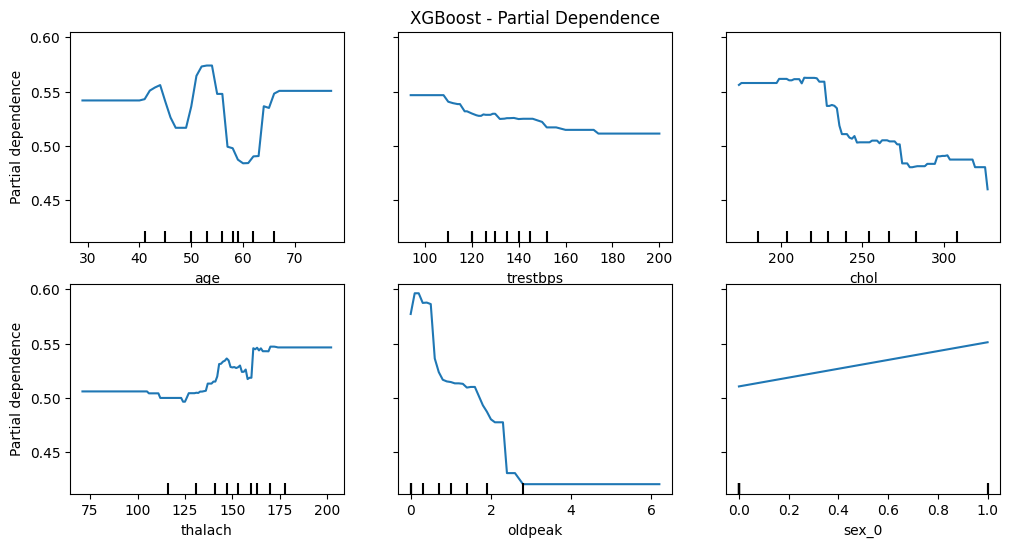

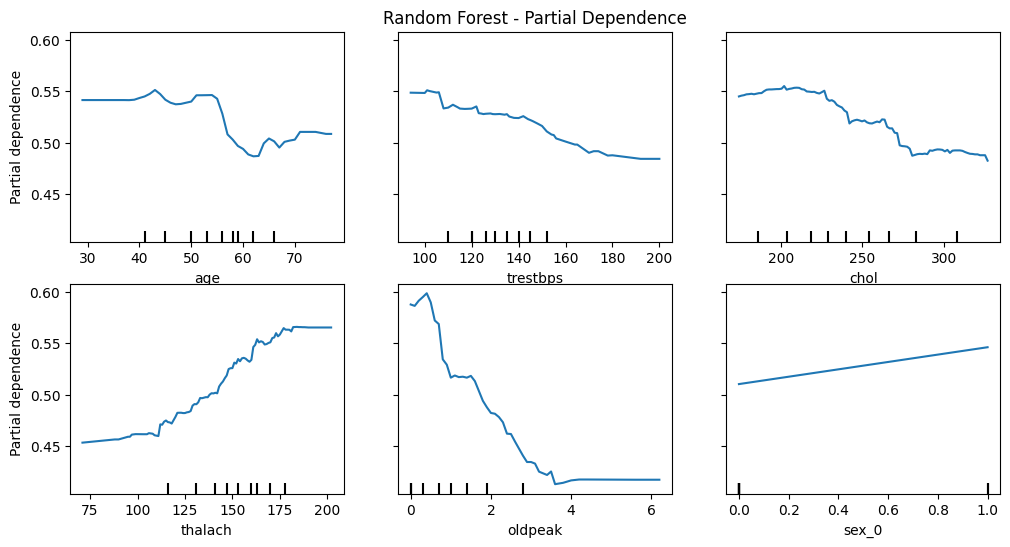

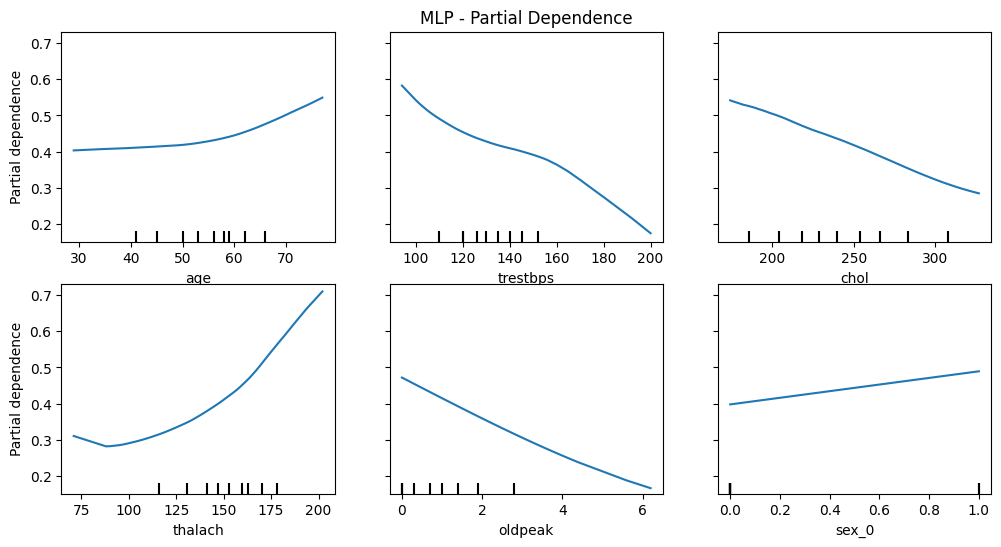

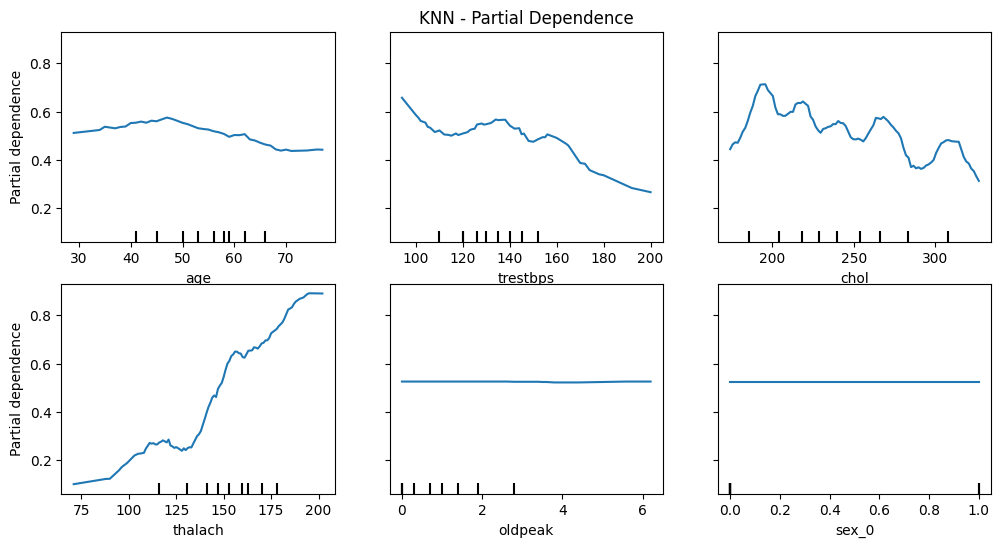

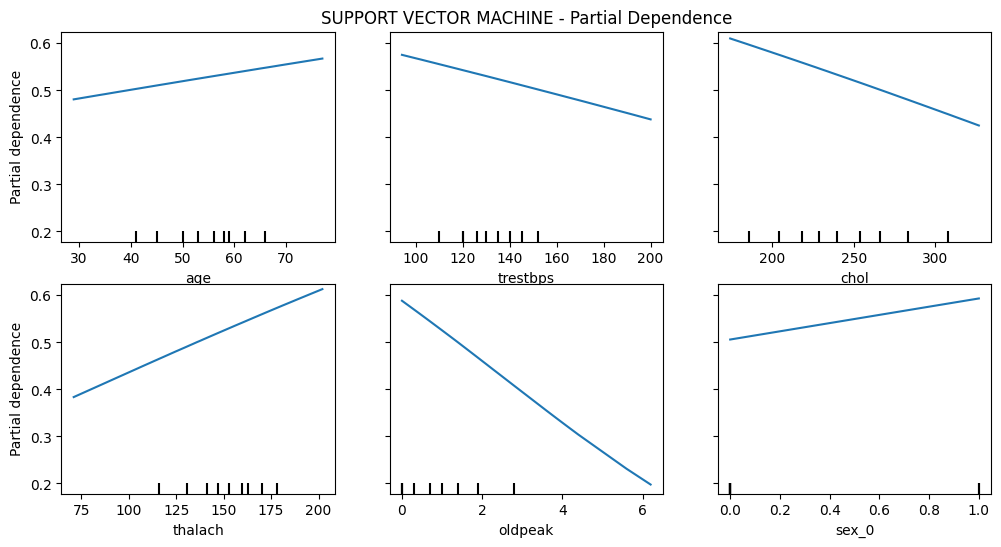

In [8]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [0, 1, 2, 3, 4, 5]

# Decision Tree
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree - Partial Dependence")
PartialDependenceDisplay.from_estimator(dt, X, features=feature_names, ax=ax)
plt.show()

# Logistic Regression
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Logistic Regression - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    logreg, X_train, features=feature_names, categorical_features=["sex_1"], ax=ax)
plt.show()

# SVM - Partial Dependence doesn't directly apply to SVM; consider other visualization methods
# SVM doesn't inherently support partial dependence plots as decision tree-based models do.

# XGBoost
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("XGBoost - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    xgb_classifier, X_train, features=feature_names, ax=ax, categorical_features=["sex_1"])
plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    rf, X_train, features=feature_names, ax=ax, categorical_features=["sex_1"])
plt.show()
# Multi-Layer Perceptron
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("MLP - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    mlp, X_train, features=feature_names, ax=ax, categorical_features=["sex_1"])
plt.show()
# KNN
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("KNN - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    knn, X_train, features=feature_names, ax=ax, categorical_features=["sex_1"])
plt.show()
# SVM
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("SUPPORT VECTOR MACHINE - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    svm, X_train, features=feature_names, ax=ax, categorical_features=["sex_1"])
plt.show()

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [9]:
import shap
import lime
import pdpbox
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import warnings

from sklearn.discriminant_analysis import StandardScaler
warnings.filterwarnings('ignore')
df = pd.read_csv("./datasets/adult.csv")
# Definition of the columns that will be features (note that the column 'clientid' is not present)
features = [
    'age', 'workclass', 'fnlwgt', 'education', 'education.num',
    'marital.status', 'occupation', 'relationship', 'race', 'sex',
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
]

# Preparation of arguments for ``scikit-learn`` library methods
X = df[features].values
# Part of transforming categorical to integer
lbp = LabelEncoder()
X[:, 1] = lbp.fit_transform(X[:, 1])

X[:, 3] = lbp.fit_transform(X[:, 3])

X[:, 5] = lbp.fit_transform(X[:, 5])

X[:, 6] = lbp.fit_transform(X[:, 6])

X[:, 7] = lbp.fit_transform(X[:, 7])
X
X[:, 8] = lbp.fit_transform(X[:, 8])

X[:, 9] = lbp.fit_transform(X[:, 9])

X[:, 13] = lbp.fit_transform(X[:, 13])

LE = LabelEncoder()

y = LE.fit_transform(df["income"])
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


# Instantiate and fit the SVM model
svm = SVC(random_state=42, probability=True).fit(X_train, y_train)

# Predicting values
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_pred_svm)

# Printing the test accuracy for SVM
print("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred_svm), "f1 :",  f1_score(y_test, y_pred_svm))

# Instantiate and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train)

# Predicting values
y_pred_logreg = logreg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_logreg)
f1_lr = f1_score(y_test, y_pred_logreg)
precision_lr = precision_score(y_test, y_pred_logreg)
recall_lr = recall_score(y_test, y_pred_logreg)
roc_lr = roc_auc_score(y_test, y_pred_logreg)

# Printing the test accuracy for Logistic Regression
print("The test accuracy score of Logistic Regression is ", accuracy_score(
    y_test, y_pred_logreg), "f1 :", f1_score(y_test, y_pred_logreg))

# Instantiate and fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Predicting values
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)

# Printing the test accuracy for Decision Tree
print("The test accuracy score of Decision Tree is ", accuracy_dt, "f1 :", f1_dt)

# Instantiate and fit the Random Forest model
rf = RandomForestClassifier().fit(X_train, y_train)

# Predicting values
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)

# Printing the test accuracy for Random Forest
print("The test accuracy score of Random Forest is ", accuracy_score(
    y_test, y_pred_rf), "f1 :",  f1_score(y_test, y_pred_rf))

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict values
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of Gradient Boosting Classifier is ",
      accuracy_score(y_test, y_pred_xgb), "f1 :",  f1_score(y_test, y_pred_xgb))

# Instantiate the mlp
mlp = MLPClassifier(hidden_layer_sizes=(64, 64),
                    max_iter=2000, random_state=42)

# Fit the mlp model
mlp.fit(X_train, y_train)

# Predict values
y_pred_mlp = mlp.predict(X_test)
accuracy_rn = accuracy_score(y_test, y_pred_mlp)
recall_rn = recall_score(y_test, y_pred_mlp)
precision_rn = precision_score(y_test, y_pred_mlp)
f1_rn = f1_score(y_test, y_pred_mlp)
roc_rn = roc_auc_score(y_test, y_pred_mlp)
# Printing the test accuracy for mlp Classifier
print("The test accuracy score of MLP Classifier is ", accuracy_score(
    y_test, y_pred_mlp), "f1 :",  f1_score(y_test, y_pred_mlp))

# Instantiate the KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

# Printing the test accuracy for mlp Classifier
print("The test accuracy score of knn Classifier is ", accuracy_score(
    y_test, y_pred_knn), "f1 :", f1_score(y_test, y_pred_knn))
# Calculate permutation importance for SVM
models = [
    ('Decision Tree', accuracy_dt, recall_dt, precision_dt, f1_dt, roc_dt),
    ('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf),
    ('XGBoost', accuracy_xgb, recall_xgb, precision_xgb, f1_xgb, roc_xgb),
    ('kNN', accuracy_knn, recall_knn, precision_knn, f1_knn, roc_knn),
    ('Logistic Regression', accuracy_lr, recall_lr, precision_lr, f1_lr, roc_lr),
    ('SVM', accuracy_svm, recall_svm, precision_svm, f1_svm, roc_svm),
    ('Neural Networks', accuracy_rn, recall_rn, precision_rn, f1_rn, roc_rn)]

df_all_models = pd.DataFrame(models, columns=[
                             'Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])
display(df_all_models)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


The test accuracy score of SVM is  0.8463333742783442 f1 : 0.6233062330623306
The test accuracy score of Logistic Regression is  0.8210293575727797 f1 : 0.5373134328358208
The test accuracy score of Decision Tree is  0.8104655447733694 f1 : 0.6030357602263957
The test accuracy score of Random Forest is  0.856651517012652 f1 : 0.6693114196656276
The test accuracy score of Gradient Boosting Classifier is  0.8669696597469598 f1 : 0.6955299409614845
The test accuracy score of MLP Classifier is  0.8356467264463825 f1 : 0.626048071548351
The test accuracy score of knn Classifier is  0.8290136346886132 f1 : 0.6200873362445415


,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC
0,Decision Tree,0.810466,0.601643,0.604435,0.603036,0.738897
1,Random Forest,0.856652,0.606263,0.746996,0.669311,0.770837
2,XGBoost,0.866970,0.635010,0.768800,0.695530,0.787471
3,kNN,0.829014,0.583162,0.662005,0.620087,0.744754
4,Logistic Regression,0.821029,0.434292,0.704413,0.537313,0.688484
5,SVM,0.846333,0.531314,0.753824,0.623306,0.738368
6,Neural Networks,0.835647,0.574949,0.687117,0.626048,0.746299


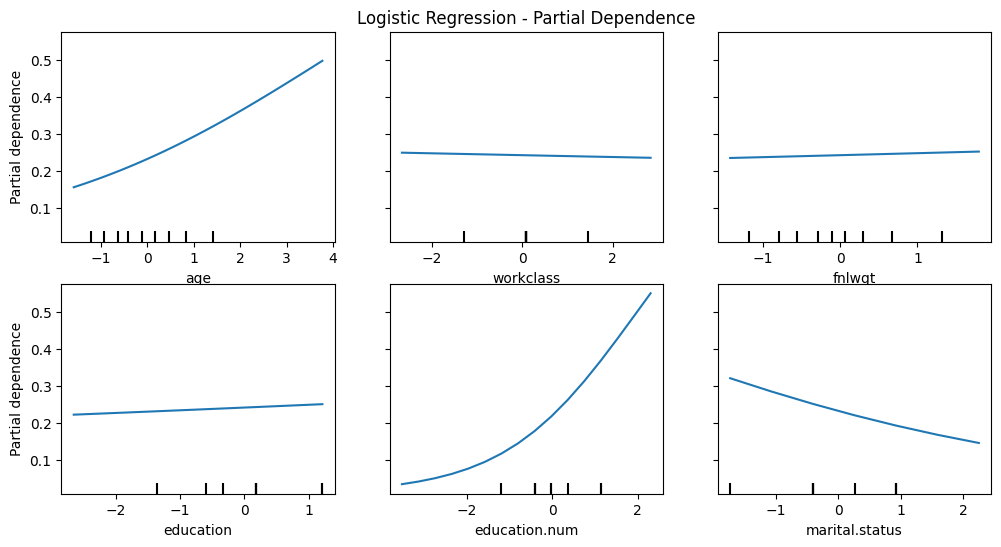

In [12]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [0, 1, 2, 3, 4, 5]


# Logistic Regression
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Logistic Regression - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    logreg, X_train, features=feature_names, ax=ax,feature_names=features)
plt.show()
